# Kinematics
>

**How to run this notebook with your data on Binder or Google collab:**

1. Create your `csv` data sets similar to Table 1 and Table 2 below in Data Analysis 4.1

2. Open this file on [Binder](https://jupyter.org/try-jupyter/lab/?path=notebooks%2FIntro.ipynb) or [Google Collab](https://colab.research.google.com/?utm_source=scs-index) window 

3. Upload your `csv` files in your cloud drive by clicking File > Open. This will open the binder workspace for you to upload your `csv` files.

4. Once uploaded, click on 'Kernel' > 'Restart & Clear Output'

5. Finally click 'Kernel' > Restart & 'Run all'

**Note:** This notebook is for reference purpose only. The analysis has not been verified and is prone to error and mistakes. Please do not use it for submission if you are taking the labs in your semester. Incase there are any error while using your own data, make sure your csv data column titles are exactly the same as mentioned in step1. Feel free to change the code and use this notebook for your further applications. Any  comments to the side of the code cell that requires correction. If you have any questions, you can get in touch with me using the links in contact section at the bottom of this notebook.
>

# 1. Purpose of the experiment
>
We'll look at how force, velocity, and acceleration interact in a one-dimensional system. The dynamics of motion will be recorded using electronic timers.
Based on your experimental results, you will learn how to compute meaningful values.

Calculations and graphical representations are performed using Jupyter-Lab, LaTex and Python libraries: `numpy`, `pandas`, `seaborn` and `plotly`.

# 2. Introduction
>
What is motion? An object’s position changes with time t. The **average velocity** $v$ expresses by what amount $\Delta x$ the position changes per time interval $\Delta t$

$$v = \frac{\Delta x}{\Delta t}\tag{1}$$

When a force F acts on the object, the velocity will change while the object is moving. The velocity
could increase or decrease, accelerate or decelerate. The **acceleration** a describes how much the velocity
changes per time interval:


$$a = \frac{\Delta v}{\Delta t}\tag{2}$$

That acceleration a of the object with a mass m is determined by the applied force F:

$$ F = m.a \tag{3}$$

Equation (1) can be modified to describe infinitely small time intervals. The resulting instantaneous
velocity is the velocity at one particular time:

$$ v(t) = \frac{dx}{dt}= \dot x \tag{4}$$

Now we can discuss the motion in terms of position, velocity and acceleration and their mutual
dependencies. The velocity develops in time depending on the constant acceleration with the initial
velocity $v0$.

$$ v(t) = a.t + v_o \tag{5}$$

The object is moving from the initial position x0 depending on v0 and the constant acceleration.

$$ x(t) = \frac{1}{2}a.t^2 + v_0.t + x_0 \tag{6} $$


If we want to speed up an object, a force is needed. This could be the gravitational force Fg acting on a
second object of mass M moving with the gravitational acceleration g. If we attach the masses to each
other with a thin thread that runs over a pulley, the force Fg will accelerate both objects – one
horizontally, one vertically. So we can choose the inertial mass m of the object we want to investigate
independently from the gravitational mass of the pulling object M. The resulting acceleration is modeled
with:

$$ F_g = M.g = (m+M).a \Leftrightarrow $$

$$ a= \frac{M}{m+M}.g \tag{7}$$



# 3.	Experimental setup and measurement procedure
>
We're utilizing a track that allows a cart to travel a set distance without encountering excessive friction. If the track is appropriately set horizontally, a cart will proceed with constant velocity according to (1). The cart may be propelled instantaneously using a mechanical starter with three phases that result in varying beginning velocities.
Alternatively, the starting can simply let go of the cart, which is propelled by a load hooked to a thread connected by a pulley.

An electronic timer reads a series of light barriers to calculate the time t it takes the cart to go from the start to a specific place x. This enables us to identify a set of points (x,t). The timer can read blackout times t in a different mode.

In other words, the time it takes the flag l to pass through the light barrier at a specific place x allows us to calculate the velocity v(x). Both measures may be used to assess how velocity varies over time v(t).


# 4.1 Data Analysis
>


#### Importing Python libraries for analysis:

In [1]:
!pip install jovian plotly -U kaleido --upgrade --quiet

In [202]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import plotly.graph_objects as go
import jovian

from IPython.display import display, Math, Markdown, Image
from sklearn.linear_model import LinearRegression
from scipy.interpolate import *

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,4.5)})

**Creating Task 1 dataframe:**

![image](https://i.gyazo.com/0c35561e722c1049372fb2f7ea7cbf9d.png)

<h4 style ='text-align:center;' >Table 1: Task 1</h4>

>

In [192]:
task_1 = {'width of stick in cm': 1,
               'mass of cart in kg': 0.401,
               'start position in cm': 7.5}

task1_df = pd.DataFrame(task_1, index=[0])

After importing the libraries task we create a `pandas` dataframe reading the `.csv` calculates the velocity using the blackout time $\Delta t$ and the length of the flag $l$.

**Importing Task 2 into dataframe:**

![image](https://i.gyazo.com/ad1bcc4cf2a8cfb127132db059af0c1d.png)

<h4 style ='text-align:center;' >Table 2: Task 2</h4>

>

In [3]:
df = pd.read_csv('task2.csv')
df = df.rename(columns={'Task 2': 'stages'})

**Importing Task 3 into dataframe:**

![image](https://i.gyazo.com/0d973bd892ee87b1e8d33588d1387ccd.png)

<h4 style ='text-align:center;' >Table 3: Task 3</h4>

>

In [4]:
df2 = pd.read_csv('task2_1.csv')

### Q: Calculate the velocities using a variable in Matlab according to (1) based on the measured blackout times $\Delta t$ and the length of the flag $l$.
>

Calculating the velocity and appending it to the original dataframe:

In [65]:
#calculating velocities for task 2 table:

df['velocity'] = 25/(df['black_out_time']*100)
#df['velocity'] = df['position']/(df['arrival_time']*100) ?? *100 to convert to meters // use this or above?
df['velocity'] = df['velocity'].round(2)

#calculating velocities for task 3 table:
df2['velocity'] = 15/(df2['black_out_time']*100)
#df2['velocity'] = df2['position']/(df2['black_out_time']*100)?? use this or above?
df2['velocity'] = df2['velocity'].round(2)

#creating a copy of dataframe to question 1 df
df_question1 = df.rename(columns= {'Task 2': 'stages',
                            'position': 'position $x$ in cm',
                            'arrival_time':'arrival time $t$ in s',
                            'black_out_time':'black-out time $\Delta t$ in s',
                            'velocity':'Velocity $v$ in m/s'})
df_question1

,stages,position $x$ in cm,arrival time $t$ in s,black-out time $\Delta t$ in s,Velocity $v$ in m/s
0,stage 1,25,0.118,0.035,7.14
1,stage 1,50,1.048,0.036,6.94
2,stage 1,75,2.017,0.037,6.76
3,stage 1,100,3.003,0.036,6.94
4,stage 2,25,0.075,0.023,10.87
5,stage 2,50,0.635,0.023,10.87
6,stage 2,75,1.203,0.024,10.42
7,stage 2,100,1.774,0.023,10.87
8,stage 3,25,0.055,0.017,14.71
9,stage 3,50,0.469,0.017,14.71


<h4 style ='text-align:center;' >Figure 1: Task 2 table - Calculated velocities</h4>

>

In [68]:
df_question1_1 = df2.rename(columns= {'position': 'position $x$ in cm',
                                      'arrival_time':'arrival time $t$ in s',
                                      'black_out_time':'black-out time $\Delta t$ in s',
                                      'velocity':'Velocity $v$ in m/s'})
df_question1_1

,stages,position $x$ in cm,arrival time $t$ in s,black-out time $\Delta t$ in s,Velocity $v$ in m/s
0,"pull 20 g, cart",22,0.262,0.093,1.61
1,"pull 20 g, cart",37,0.927,0.029,5.17
2,"pull 20 g, cart",52,1.288,0.021,7.14
3,"pull 20 g, cart",67,1.555,0.017,8.82
4,"pull 40 g, cart",22,0.174,0.059,2.54
5,"pull 40 g, cart",37,0.631,0.021,7.14
6,"pull 40 g, cart",52,0.882,0.015,10.00
7,"pull 40 g, cart",67,1.075,0.013,11.54
8,"pull 20 g, cart + 200 g",22,0.256,0.094,1.60
9,"pull 20 g, cart + 200 g",37,1.016,0.035,4.29


<h4 style ='text-align:center;' >Figure 2: Task 3 table - Calculated velocities</h4>

>

### Q: Plot the position x(t) as a function of the arrival time based on the data 1.2 and 2.2. Calculate and plot the velocity v(t) based on the data 1.3 and 2.3.
>

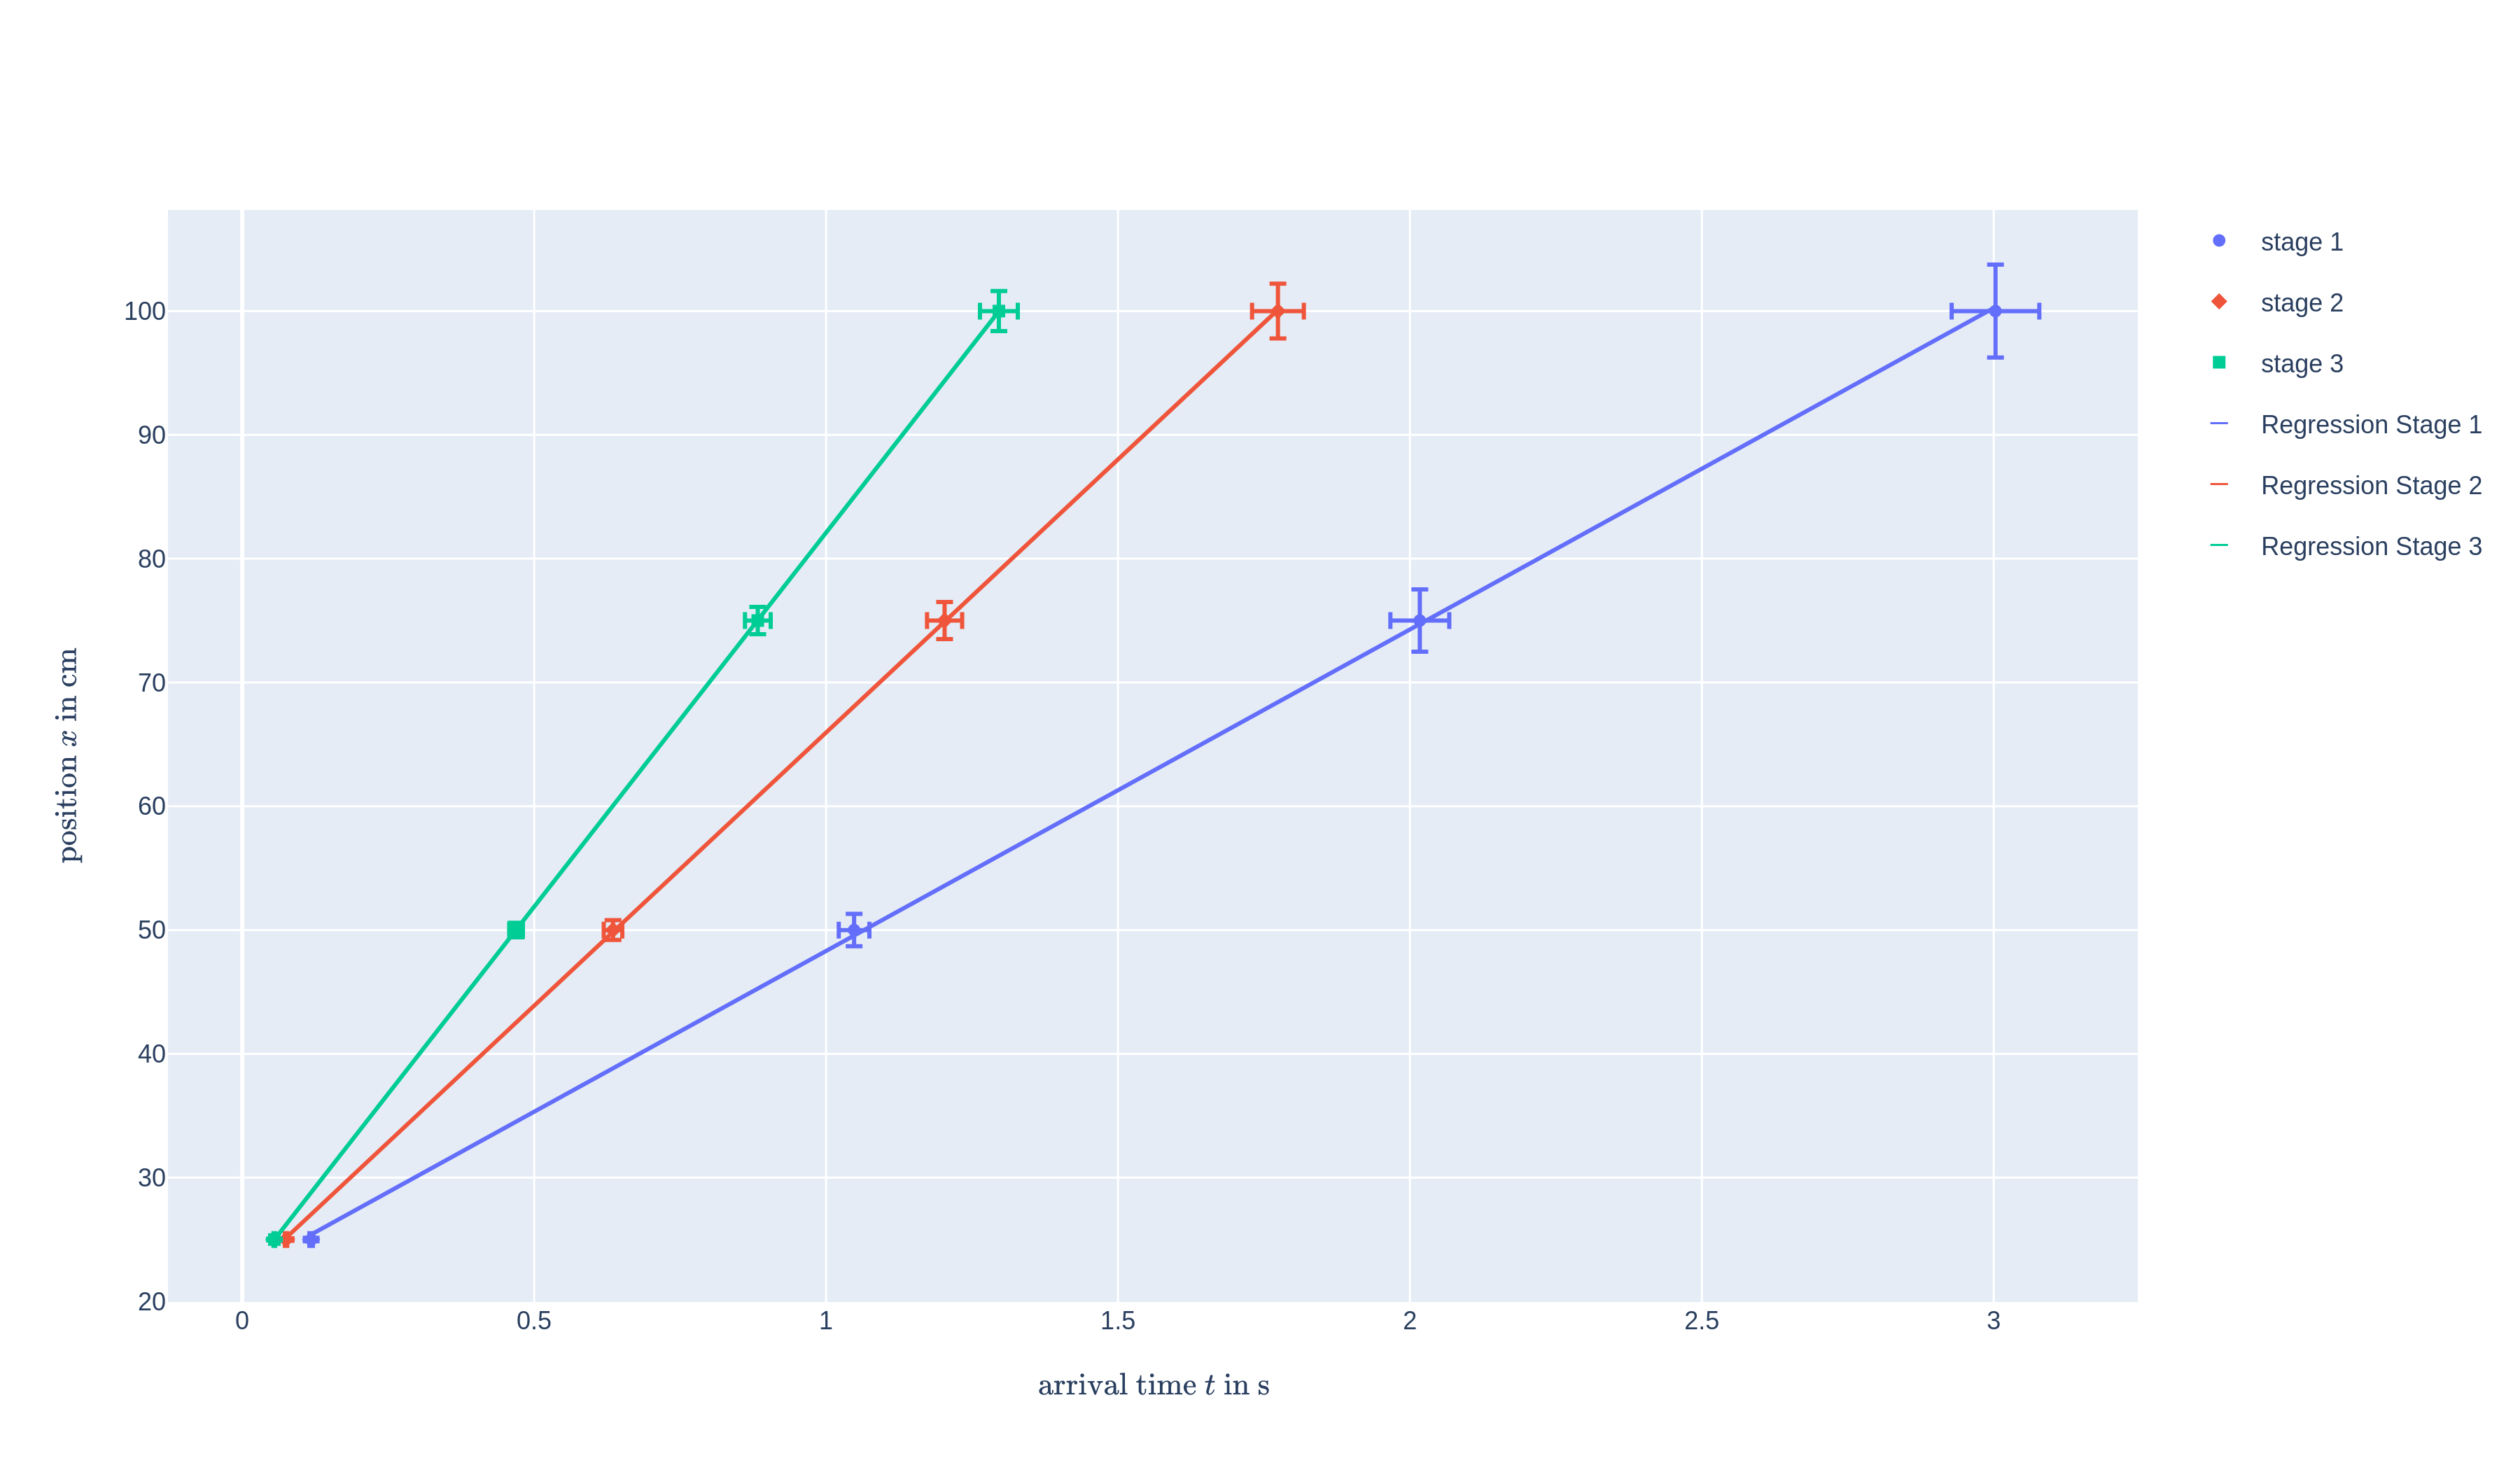

In [207]:
#copy of original dataframe for separate plots
df_regression = df.copy()
df_error = df.copy()


#error-estimation df and plot
df_error['e_plus'] = df_error['arrival_time']/0.8
df_error['e_minus'] = df_error['arrival_time']/40

error_points = px.scatter(df_error, x='arrival_time', y='position', 
                          color ='stages',symbol = 'stages',
                          error_y = 'e_plus', error_x = 'e_minus')


#Regression df and trendline
df_regression = df_regression.replace({'stages' : { 'stage 1' : 'Regression Stage 1', 
                                                    'stage 2' : 'Regression Stage 2', 
                                                    'stage 3' : 'Regression Stage 3' }})

#Calculating Ordinary Least Squares regression
regression = px.scatter(df_regression, x='arrival_time', y='position', 
                        color='stages', trendline='ols') 
regression.update_traces(marker_symbol = 141)


figure_3 = go.Figure(data = error_points.data + regression.data)
figure_3.update_layout(xaxis_title = r'$ \text{arrival time } t \text{ in s}$',
                      yaxis_title = r'$ \text{position } x \text{ in cm}$')

image_bytes = figure_3.to_image(format='png', width=1200, height=700, scale=3)
Image(image_bytes)

#figure_3.show() #Remove # before figure_3 to enable interactive graph



<h4 style ='text-align:center;' >Figure 3: position $x(t)$ as a function of the arrival time</h4>

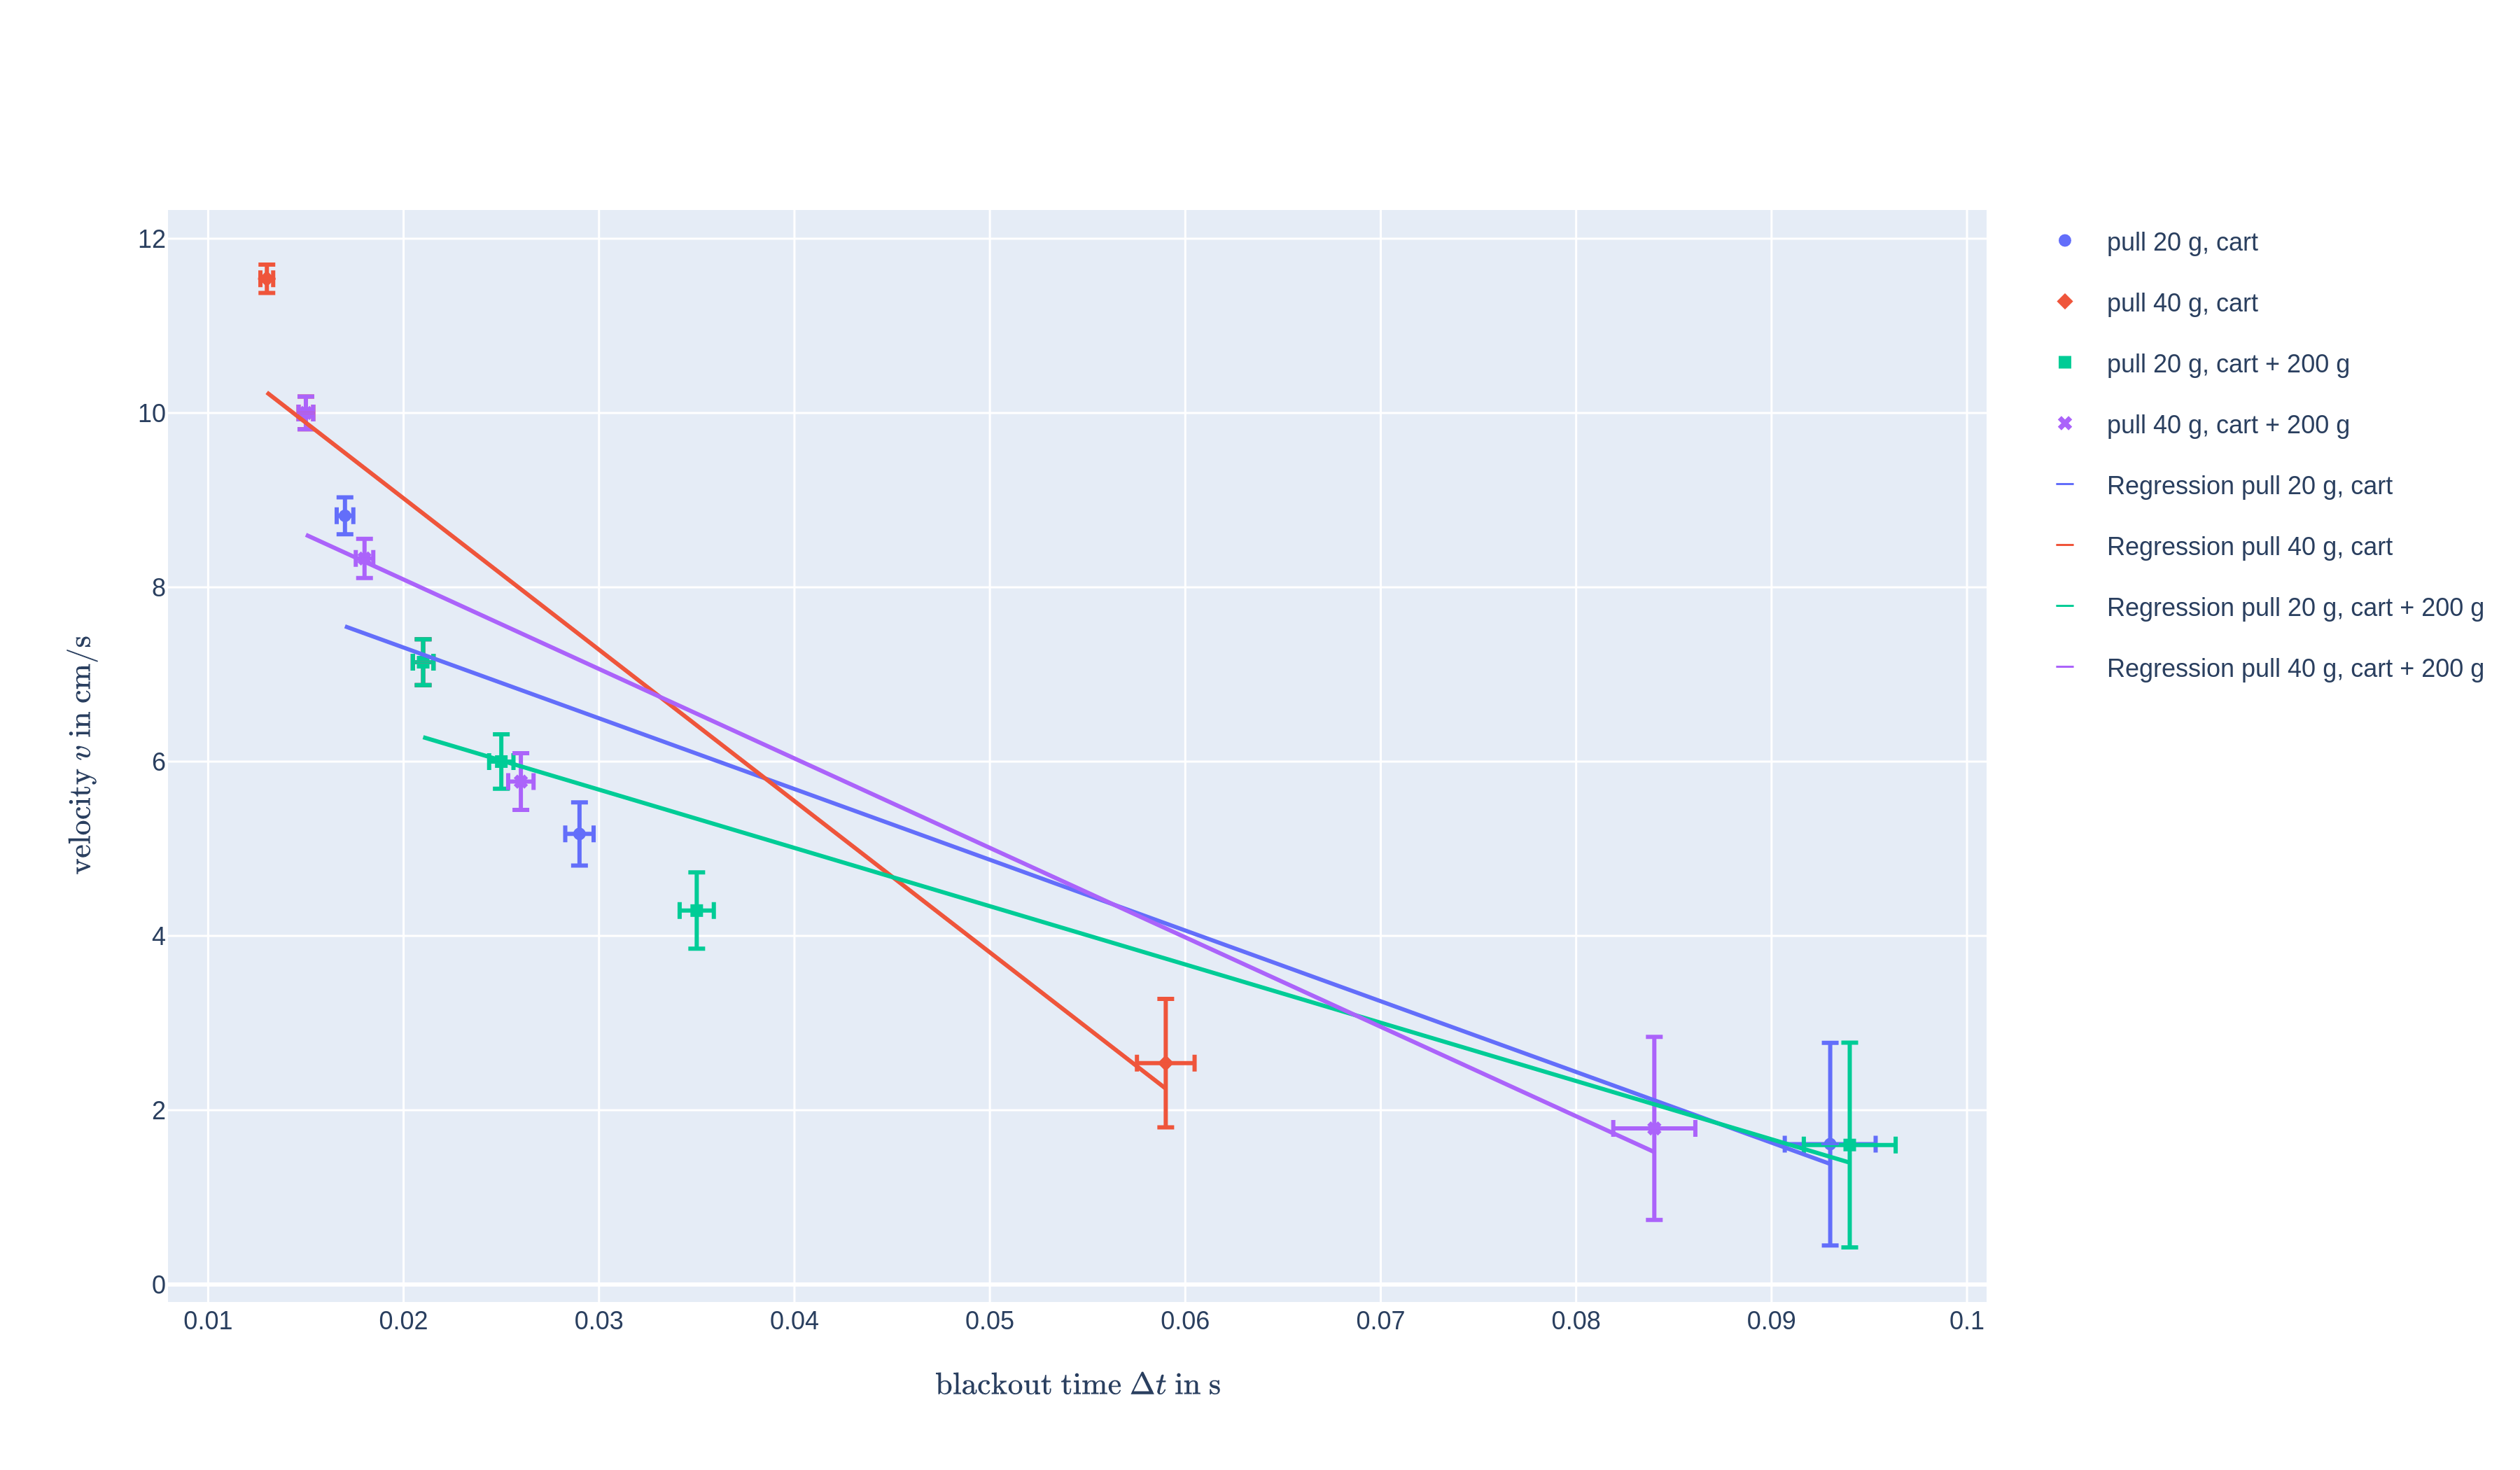

In [208]:
#copy of original dataframe for separate plots
df2_regression = df2.copy()
df2_error = df2.copy()


#error-estimation df and plot
df2_error['e_plus'] = df2_error['black_out_time']/0.08
df2_error['e_minus'] = df2_error['black_out_time']/40

error_points = px.scatter(df2_error, x='black_out_time', y='velocity', 
                          color ='stages',symbol = 'stages',
                          error_y = 'e_plus', error_x = 'e_minus')


#Regression df and trendline
df2_regression = df2_regression.replace({'stages' : { 'pull 20 g, cart' : 'Regression pull 20 g, cart', 
                                                    'pull 40 g, cart' : 'Regression pull 40 g, cart', 
                                                    'pull 20 g, cart + 200 g' : 'Regression pull 20 g, cart + 200 g',
                                                    'pull 40 g, cart + 200 g':'Regression pull 40 g, cart + 200 g'}})

#Calculating Ordinary Least Squares regression
regression = px.scatter(df2_regression, x='black_out_time', y=df2_regression['velocity'], 
                        color='stages', trendline='ols') 
regression.update_traces(marker_symbol = 141)


figure_4 = go.Figure(data = error_points.data + regression.data)
figure_4.update_layout(xaxis_title = r'$ \text{blackout time } \Delta t \text{ in s}$',
                      yaxis_title = r'$ \text{velocity } v \text{ in cm/s}$')

image_bytes = figure_4.to_image(format='png', width=1200, height=700, scale=3)
Image(image_bytes)

#figure_4.show() #Remove # before figure_4 to enable interactive graph

<h4 style ='text-align:center;' >Figure 4: velocity $v(t)$ as a function of the blackout time</h4>

>

### Q: Extract the velocities from the slopes of the $x(t)$ -diagram
>

Text(0, 0.5, 'position $ x $ in cm')

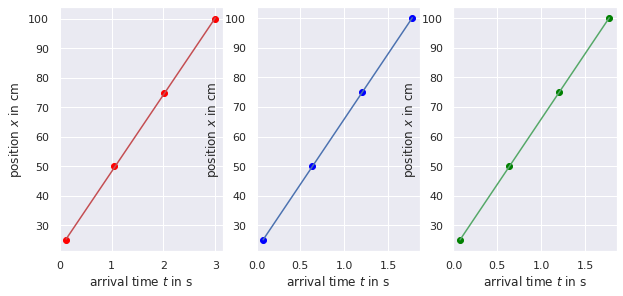

In [178]:
m_stage1 = np.polyfit(df.arrival_time.iloc[0:4], df.position.iloc[0:4], 1)
m_stage2 = np.polyfit(df.arrival_time.iloc[4:8], df.position.iloc[4:8], 1)
m_stage3 = np.polyfit(df.arrival_time.iloc[8:12], df.position.iloc[8:12], 1)


fig, axes = plt.subplots(1,3)

axes[0].scatter(df.arrival_time.iloc[0:4], df.position.iloc[0:4], c='red')
axes[0].plot(df.arrival_time.iloc[0:4], np.polyval(m_stage1,df.arrival_time.iloc[0:4]), 'r-')
axes[0].set_xlabel('arrival time $ t $ in s')
axes[0].set_ylabel('position $ x $ in cm')


axes[1].scatter(df.arrival_time.iloc[4:8], df.position.iloc[4:8], c='blue')
axes[1].plot(df.arrival_time.iloc[4:8], np.polyval(m_stage2,df.arrival_time.iloc[4:8]), 'b-')
axes[1].set_xlabel('arrival time $ t $ in s')
axes[1].set_ylabel('position $ x $ in cm')

axes[2].scatter(df.arrival_time.iloc[4:8], df.position.iloc[4:8], c='green')
axes[2].plot(df.arrival_time.iloc[4:8], np.polyval(m_stage2,df.arrival_time.iloc[4:8]), 'g-')
axes[2].set_xlabel('arrival time $ t $ in s')
axes[2].set_ylabel('position $ x $ in cm')



<h4 style ='text-align:center;' >Figure 5: Regression lines for $x(t)$ as a function of the arrival time</h4>

>

In [48]:
print( 'The extracted slope; velocity for stage 1 is: {} cm/s' .format(round(m_stage1[0],3)))
print( 'The extracted slope; velocity for stage 2 is: {} cm/s' .format(round(m_stage2[0],3)))
print( 'The extracted slope; velocity for stage 3 is: {} cm/s' .format(round(m_stage3[0],3)))

The extracted slope; velocity for stage 1 is: 25.972 cm/s
The extracted slope; velocity for stage 2 is: 44.13 cm/s
The extracted slope; velocity for stage 3 is: 60.43 cm/s


### Q: Extract the accelerations from the slopes of the $v(t)$.
>

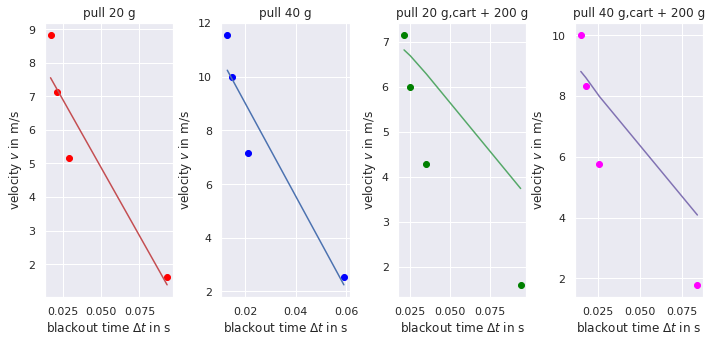

In [179]:
pull_20_c = np.polyfit(df2.black_out_time.iloc[0:4], df2.velocity.iloc[0:4],1)
pull_40_c = np.polyfit(df2.black_out_time.iloc[4:8], df2.velocity.iloc[4:8],1)
pull_20_200c =np.polyfit(df2.black_out_time.iloc[8:12], df2.velocity.iloc[8:12],1)
pull_40_200c =np.polyfit(df2.black_out_time.iloc[12:16], df2.velocity.iloc[12:16],1)

fig, axes = plt.subplots(1,4)
fig.tight_layout()

axes[0].scatter(df2.black_out_time.iloc[0:4], df2.velocity.iloc[0:4], c='red')
axes[0].plot(df2.black_out_time.iloc[0:4], np.polyval(pull_20_c,df2.black_out_time.iloc[0:4]), 'r-')
axes[0].set_xlabel('blackout time $\Delta t $ in s')
axes[0].set_ylabel('velocity $ v $ in m/s')
axes[0].title.set_text('pull 20 g')


axes[1].scatter(df2.black_out_time.iloc[4:8], df2.velocity.iloc[4:8], c='blue')
axes[1].plot(df2.black_out_time.iloc[4:8], np.polyval(pull_40_c,df2.black_out_time.iloc[4:8]), 'b-')
axes[1].set_xlabel('blackout time $\Delta t $ in s')
axes[1].set_ylabel('velocity $ v $ in m/s')
axes[1].title.set_text('pull 40 g')

axes[2].scatter(df2.black_out_time.iloc[8:12], df2.velocity.iloc[8:12], c='green')
axes[2].plot(df2.black_out_time.iloc[8:12], np.polyval(pull_20_200c,df2.black_out_time.iloc[4:8]), 'g-')
axes[2].set_xlabel('blackout time $\Delta t $ in s')
axes[2].set_ylabel('velocity $ v $ in m/s')
axes[2].title.set_text('pull 20 g,cart + 200 g')

axes[3].scatter(df2.black_out_time.iloc[12:16], df2.velocity.iloc[12:16], c='magenta')
axes[3].plot(df2.black_out_time.iloc[12:16], np.polyval(pull_40_200c,df2.black_out_time.iloc[4:8]), 'm-')
axes[3].set_xlabel('blackout time $\Delta t $ in s')
axes[3].set_ylabel('velocity $ v $ in m/s')
axes[3].title.set_text('pull 40 g,cart + 200 g')



<h4 style ='text-align:center;' >Figure 6: Regression lines for $v(t)$ as a function of the blackout time $\Delta t$ </h4>

>

In [180]:
display(Markdown(
rf"""The extracted slope; acceleration for pull 20 g,cart is: ${round(pull_20_c[0]/100,3)} m/s^2$                     
                    
The extracted slope; acceleration for pull 40 g,cart is: ${round(pull_40_c[0]/100,3)} m/s^2$

The extracted slope; acceleration for pull 20 g,cart + 200 g is: ${round(pull_20_200c[0]/100,3)} m/s^2$

The extracted slope; acceleration for pull 40 g,cart + 200 g is: ${round(pull_40_200c[0]/100,3)} m/s^2$
"""))

The extracted slope; acceleration for pull 20 g,cart is: $-0.812 m/s^2$                     
                    
The extracted slope; acceleration for pull 40 g,cart is: $-1.737 m/s^2$

The extracted slope; acceleration for pull 20 g,cart + 200 g is: $-0.669 m/s^2$

The extracted slope; acceleration for pull 40 g,cart + 200 g is: $-1.026 m/s^2$


### Q: Calculate theoretical acceleration:
>
If we want to speed up an object, a force is needed. This could be the gravitational force Fg acting on a
second object of mass M moving with the gravitational acceleration g. If we attach the masses to each
other with a thin thread that runs over a pulley, the force Fg will accelerate both objects – one
horizontally, one vertically. So we can choose the inertial mass m of the object we want to investigate
independently from the gravitational mass of the pulling object M. The resulting acceleration is modeled
with:

$$ F_g = M.g = (m+M).a \Leftrightarrow $$

$$ a= \frac{M}{m+M}.g \tag{7}$$

In [183]:
theoretical = {'M': (0.02, 0.04, 0.02, 0.04),
               'm': (0.401, 0.401, 0.601, 0.801),
               'g': (-9.81, -9.81, -9.81, -9.81)}

theoretical_df = pd.DataFrame(pull)

theoretical_df['a'] = (theoretical_df.M/(theoretical_df.m +theoretical_df.M))*-9.81
theoretical_df['a'] = round(theoretical_df['a'],2)


theoretical_df = theoretical_df.rename(columns= {'M':'M in kg',
                                                 'm':'m in kg',
                                                 'g':'g in kgm/s',
                                                 'a':'acceleration $a$ in m/$s^2$'})
theoretical_df


,M in kg,m in kg,g in kgm/s,acceleration $a$ in m/$s^2$
0,0.02,0.401,9.81,-0.47
1,0.04,0.401,9.81,-0.89
2,0.02,0.601,9.81,-0.32
3,0.04,0.801,9.81,-0.47


# 4.2 Data: Results

>

## Task 2

![image](https://i.gyazo.com/ab91c3f5be481d38d55e328f90040ecd.png)


## Task 3

![image](https://i.gyazo.com/1bc524b0d02611da6f18c4acf7262e05.png)

## Cases:

![Image](https://i.gyazo.com/969c57e1113f214d893b4a10d8296dd3.png)

# 5. Conclusion

>

Due to friction and errors in measurement 1, velocity was decreasing even though in theory, it has to stay constant. Higher stage gave the cart larger force, according to Newton's second law, as acceleration of the higher stage is larger,, and so is velocity. In measurement 2, because of friction and errors, acceleration of cart is smaller than in theory, as well as the final velocity.
According to $F=ma$, and due to friction in form of the normal force, acceleration of a 20g pull is smaller than a 40g pull. When the force is constant, more mass can cause less acceleration. When the cart is pulled by a larger mass, acceleration, as well as velocity increases

# 6. References

>


1) [KaTex](https://katex.org/): Math typesetting library

2) University lab notes turned into Jupyter notebook with [Latex](https://www.latex-project.org/)

3) Python Libraries used:
- [Matplotlib](https://matplotlib.org/3.5.0/index.html) 
- [SymPY](https://docs.sympy.org/latest/index.html)
- [NumPy](https://numpy.org/doc/stable/user/index.html#user)
- [Plotly](https://plotly.com/python/)
- [Seaborn](https://seaborn.pydata.org/)

# 7. Contact

Feel free to reach out to me. I am currently looking to volunteer for Exploratory Data Analysis and python projects to improve my skill. If you have an questions about the notebook, reach out to on me on my LinkedIn or github:

- [LinkedIn](https://www.linkedin.com/in/royceantonjose/)
- [Github](https://github.com/ranton95)

In [201]:
# Execute this to save new versions of the notebook
jovian.commit(project="physics-lab-1")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ranton95/physics-lab-1" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ranton95/physics-lab-1


'https://jovian.ai/ranton95/physics-lab-1'